In [21]:
import pandas as pd
import numpy as np
import json
from tqdm.notebook import tqdm_notebook
import tmdbsimple as tmdb
import matplotlib.pyplot as plt

from scipy import stats
import scipy
scipy.__version__

'1.8.1'

In [2]:
import seaborn as sns
import plotly.express as px

In [71]:
df= pd.read_csv('Data/Two_Years_tmdb_combined_data.csv.gz')
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,132000000.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.975,2069.0,PG
2,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,132000000.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.975,2069.0,PG
3,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,132000000.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.975,2069.0,PG
4,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,132000000.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.975,2069.0,PG


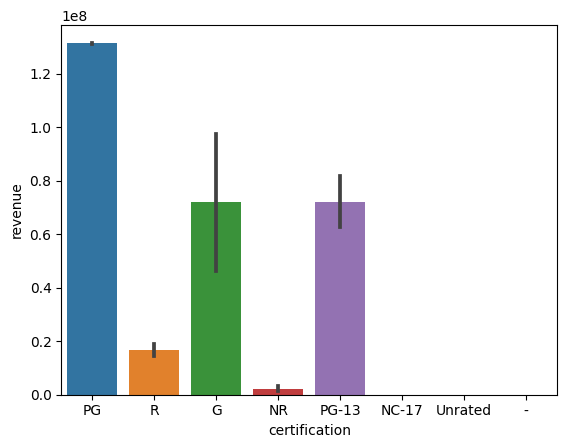

In [4]:
ax = sns.barplot(data=df, x='certification', y='revenue', ci=68)

In [5]:
df['certification'].value_counts()

PG         6266
R           451
PG-13       180
NR           66
G            24
NC-17         6
Unrated       1
-             1
Name: certification, dtype: int64

In [6]:
needed_cols=['certification', 'revenue']
df[needed_cols]

,certification,revenue
0,NaN,NaN
1,PG,132000000.0
2,PG,132000000.0
3,PG,132000000.0
4,PG,132000000.0
...,...,...
8693,NaN,0.0
8694,NaN,0.0
8695,NaN,0.0
8696,NR,0.0


In [7]:
groups = {}
for certification in df['certification'].unique():
    temp=df.loc[df['certification']==certification, 'revenue']
    groups[certification]= temp
    
    
groups.keys()

dict_keys([nan, 'PG', 'R', 'G', 'NR', 'PG-13', 'NC-17', 'Unrated', '-'])

In [8]:
groups.items()

dict_items([(nan, Series([], Name: revenue, dtype: float64)), ('PG', 1       132000000.0
2       132000000.0
3       132000000.0
4       132000000.0
5       132000000.0
           ...     
8360            0.0
8387            0.0
8442            0.0
8493            0.0
8580            0.0
Name: revenue, Length: 6266, dtype: float64), ('R', 3150         0.0
3151         0.0
3152         0.0
3156     14904.0
3161    105983.0
          ...   
8494         0.0
8528         0.0
8538         0.0
8563         0.0
8603         0.0
Name: revenue, Length: 451, dtype: float64), ('G', 3158    224834564.0
3165    169327687.0
3169            0.0
3420     27965865.0
3528     19748009.0
3563            0.0
3591    183611771.0
3614    103291131.0
3710     45554533.0
3837     68411275.0
4077            0.0
4139            0.0
4307            0.0
7510    579707738.0
7536       100202.0
7809    165335153.0
7900            0.0
7995     44460850.0
8029     80936232.0
8097     18634654.0
8131            0.0
8

## The stakeholder's first question is: does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?



1A. (Null Hypothesis): a movies' Ratings doesn't affect the revenue it generates

1B. (Alternative Hypothesis): A movies' ratings can determine how much revenue a movie generates.

In [9]:
temp = np.abs(stats.zscore(groups['PG'])) > 3
temp.value_counts()

False    6208
True       58
Name: revenue, dtype: int64

In [10]:
#loop  through group dict
for certification,data in groups.items():
    #determine if there are any outliers
    outliers= np.abs(stats.zscore(data)) > 3
    ##Print a statement about how many outliers for which group name
    print(f'there were {outliers.sum()} outliers in the {certification} group')
    ##Remove the outliers from data and overwrite the sector data in the dict
    data = data.loc[~outliers]
    groups[certification] = data 

there were 0 outliers in the nan group
there were 58 outliers in the PG group
there were 11 outliers in the R group
there were 1 outliers in the G group
there were 3 outliers in the NR group
there were 5 outliers in the PG-13 group
there were 0 outliers in the NC-17 group
there were 0 outliers in the Unrated group
there were 0 outliers in the - group


In [11]:
stats.normaltest(groups['PG']).pvalue


0.0

In [12]:
stats.normaltest(groups['R']).pvalue<0.5

True

In [13]:
stats.normaltest(groups['PG-13']).pvalue<0.5


True

In [14]:
stats.normaltest(groups['G']).pvalue<0.5

True

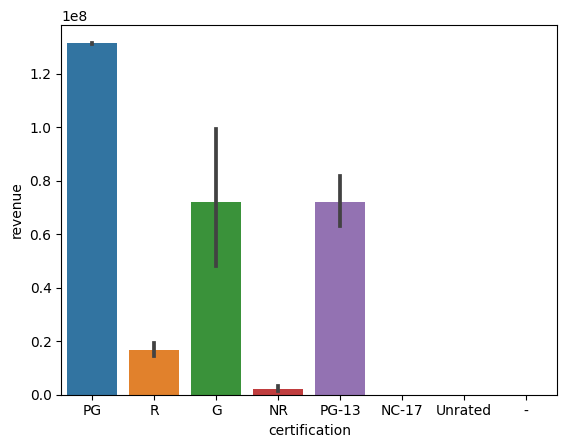

In [15]:
ax = sns.barplot(data=df, x='certification', y='revenue', ci=68)

movies rated PG earned the most money in 2000 and 2001, thee P value is 0.0

In [42]:
df2= pd.read_csv('Data/final_tmdb_data_2002.csv.gz')
df2.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,132000000.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.975,2069.0,PG
2,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,132000000.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.975,2069.0,PG
3,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,132000000.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.975,2069.0,PG
4,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,132000000.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.975,2069.0,PG


## Do movies under 150 min in runtime affect revenue?

## hypothesis for question 1

 - Null hyp = a movie whos run time  exceeds 150 min does not affect movie revenue
 reject null = a movie whos run time does not exceed 150 run time does affect a movies revenue

In [32]:
under_grp = df['runtime'] > 150
over_grp =  df ['runtime']< 150

In [63]:
df['under_rt'] = under_grp = df['runtime'] > 150


In [64]:
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,under_rt
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.975,2069.0,PG,False
2,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.975,2069.0,PG,False
3,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.975,2069.0,PG,False
4,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.975,2069.0,PG,False


In [34]:
idx_outliers= np.abs(stats.zscore(under_grp)) >3
idx_outliers.sum()

59

In [35]:
idx_outliers= np.abs(stats.zscore(over_grp)) >3
idx_outliers.sum()

62

In [36]:
stats.normaltest(under_grp)

NormaltestResult(statistic=14753.196889174453, pvalue=0.0)

In [37]:
stats.normaltest(over_grp)

NormaltestResult(statistic=14554.778320063164, pvalue=0.0)

In [38]:
stats.levene(over_grp,under_grp)

LeveneResult(statistic=0.07489286052588508, pvalue=0.7843448655796872)

In [39]:
#run stats.ttest_ind on the 2 groups

stats.ttest_ind(over_grp,under_grp)

Ttest_indResult(statistic=782.4099498908379, pvalue=0.0)

The null hypothesis is rejected.  movies whos run time exceeds 150 minutes have a different revenue than those that do not in the years 2000 and 2001.

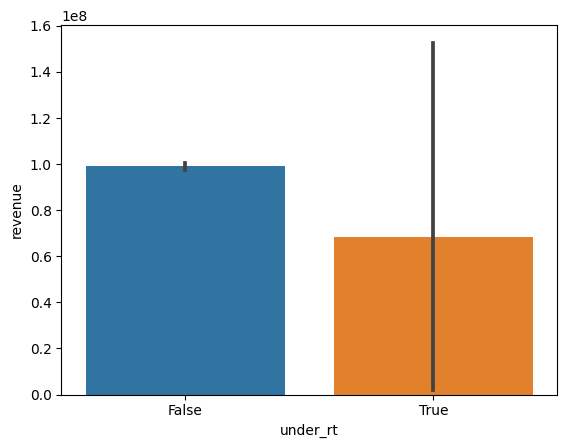

In [66]:
ax=sns.barplot(data=df, x = 'under_rt' ,y = 'revenue')

In [69]:
df_05 = pd.read_csv( 'Data/final_tmdb_data_2005.csv.gz')
df_05

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,132000000.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.975,2069.0,PG
2,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,132000000.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.975,2069.0,PG
3,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,132000000.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.975,2069.0,PG
4,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,132000000.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.975,2069.0,PG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5878,tt6693930,0.0,/oWO8yKoCRdZGEDrdIOxLOszWcB0.jpg,NaN,10000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",NaN,550494.0,fa,نقاب,...,100000.0,90.0,"[{'english_name': 'Persian', 'iso_639_1': 'fa'...",Released,NaN,Mask,0.0,0.000,0.0,NaN
5879,tt7069814,0.0,NaN,NaN,0.0,[],NaN,619708.0,nl,Kiddo the Super-Truck,...,0.0,0.0,[],Released,NaN,Kiddo the Super-Truck,0.0,0.000,0.0,NaN
5880,tt7616520,0.0,NaN,NaN,0.0,[],NaN,792438.0,zh,两个人的芭蕾,...,0.0,93.0,[],Released,NaN,Ballet of Two Dancers,0.0,0.000,0.0,NaN
5881,tt7775516,0.0,NaN,NaN,0.0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 27, 'na...",https://www.youtube.com/watch?v=wDeQ9CfW9YA,939616.0,en,Everything Means Nothing,...,0.0,70.0,[],Released,A hostage situation of the mind. Does anyone c...,Everything Means Nothing,0.0,10.000,1.0,NaN


In [68]:
df.describe()

,adult,budget,id,popularity,revenue,runtime,video,vote_average,vote_count
count,5882.000000,5.882000e+03,5.882000e+03,5882.000000,5.882000e+03,5882.000000,5882.000000,5882.000000,5882.000000
mean,0.000340,3.768158e+07,4.699981e+05,111.504386,9.884462e+07,98.037572,0.001020,6.300325,1571.409555
std,0.018438,2.215482e+07,2.214653e+05,65.671489,6.146857e+07,17.273669,0.031925,1.698436,1005.037810
min,0.000000,0.000000e+00,1.700000e+01,0.600000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.500000e+07,5.014745e+05,13.067750,1.862314e+07,101.000000,0.000000,6.975000,541.000000
50%,0.000000,5.000000e+07,5.878070e+05,151.699000,1.320000e+08,101.000000,0.000000,6.975000,2069.000000
75%,0.000000,5.000000e+07,5.878070e+05,151.699000,1.320000e+08,101.000000,0.000000,6.975000,2069.000000
max,1.000000,2.070000e+08,1.013690e+06,245.056000,8.959210e+08,200.000000,1.000000,10.000000,18103.000000


In [67]:
 df_05.describe()

,adult,budget,id,popularity,revenue,runtime,video,vote_average,vote_count
count,5882.000000,5.882000e+03,5.882000e+03,5882.000000,5.882000e+03,5882.000000,5882.000000,5882.000000,5882.000000
mean,0.000340,3.768158e+07,4.699981e+05,111.504386,9.884462e+07,98.037572,0.001020,6.300325,1571.409555
std,0.018438,2.215482e+07,2.214653e+05,65.671489,6.146857e+07,17.273669,0.031925,1.698436,1005.037810
min,0.000000,0.000000e+00,1.700000e+01,0.600000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.500000e+07,5.014745e+05,13.067750,1.862314e+07,101.000000,0.000000,6.975000,541.000000
50%,0.000000,5.000000e+07,5.878070e+05,151.699000,1.320000e+08,101.000000,0.000000,6.975000,2069.000000
75%,0.000000,5.000000e+07,5.878070e+05,151.699000,1.320000e+08,101.000000,0.000000,6.975000,2069.000000
max,1.000000,2.070000e+08,1.013690e+06,245.056000,8.959210e+08,200.000000,1.000000,10.000000,18103.000000
